In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import sosfilt, butter

In [ ]:
sub = 1 

In [43]:
clean_eeg_df = pd.read_csv(f'../data/sub0{sub}_eeg_clean.csv')
noisy_eeg_df = pd.read_csv(f'../data/sub0{sub}_eeg_noisy.csv')
ssvep_eeg_df = pd.read_csv(f'../data/sub0{sub}_eeg_ssvep.csv')

Text(0, 0.5, 'mV')

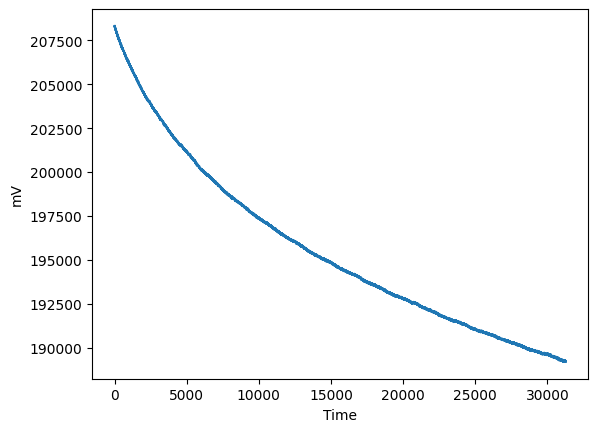

In [55]:
plt.plot(ssvep_eeg_df.to_numpy()[:,4])
plt.xlabel('Time')
plt.ylabel('mV')

In [60]:
sampling_rate = 250
nyquist_freq = sampling_rate / 2
order = 4
lowcut = 0.5 / nyquist_freq
sos_hp = butter(order, lowcut, btype='high', output='sos', fs=sampling_rate)

In [61]:
eeg_hp = sosfilt(sos_hp, ssvep_eeg_df.to_numpy()[:,4], axis=0)